Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [2]:
NAME = "Aisse Torres Torres"
COLLABORATORS = "Bruna"

---

In [3]:
from __future__ import print_function
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# HW 6b:  ODE Methods - Initial Value Problems - Stability and Stiffness



## Question 1 - Absolute Stability Regions and Order Stars

**(a)** [10] Single Step Schemes:
    
Derive $R(z)$ for the following single step schemes
* 2nd order Taylor Series method
* 4th order Taylor Series method
* RK2
* RK4

and comment on your solutions.

    Derive Taylor Series Methods R(z):
    
First, for both the 2nd and 4th order Taylor Series methods we need to use Taylor Series formulas.

$$ T_n(x) = \sum_{i=1}^{n} \frac{1}{i!} f^{(i)}(x_0)(x-x_0)^i $$
$$ T_n(x) = f(x_0) + f'(x_0)(x-x_0) + \frac{1}{2} f''(x_0)(x-x_0)^{2} + \frac{1}{6} f'''(x_0)(x-x_0)^{3} + \dots $$

for an nth order Taylor expansion around the point $x = x_0$. Lets suppose that $y(x)$ is a solution to:

$$ y'(x) = F(x, y) $$

Which satisfies the initial condition:

$$ y(x_0) = y_0 $$

Since $ x = x_0 $ implies that $ y = y_0 $, we can infer that: 

$$ y'(x_0) = x_0 $$

Now lets apply this to the test problem: 

$$ u' = \lambda u $$

Then we obtain an expression of the form: 

$$ U^{n+1} = R(z)u^n $$

Where $ R(z) = k\lambda $. Now, the pth order Taylor series method, when we apply it to $ u' = \lambda u $, gives: 

$$ U^{n+1} = U^n + k \lambda U^n + \frac{1}{2}k^2\lambda^2U^n + \frac{1}{6}k^3\lambda^3U^n + \dots $$

Therefore for 2nd order Taylor Series: 

$$ U^{n+1} = U^n + k \lambda U^n + \frac{1}{2}k^2\lambda^2U^n $$ 

$$ \therefore R(z) = U^n(1 + z + \frac{1}{2}z^2) $$

Which happens to make it so that $ R(z) $ is the polynomial obtained from the first $ p + 1 $ terms of the Taylor series for $ e^z $. 

Similarily for the 4th order Taylor Series: 

$$ U^{n+1} = U^n + k \lambda U^n + \frac{1}{2}k^2\lambda^2U^n + \frac{1}{6}k^3\lambda^3U^n + \frac{1}{24}k^4 \lambda^4U^n $$

$$ \therefore R(z) = U^n(1 + z + \frac{1}{2}z^2 + \frac{1}{6}z^3 + \frac{1}{24}z^4) $$


    Derive Runge Kutta R(z): 
    
Lets first start with the second order formula when applied to $ u' = \lambda u $, and where, given a Butcher array, $ a = \frac{1}{2\theta} $.

$$ u k_1 = u f(x_n, y_n) = \lambda u y_n = u' y_n $$ 

$$ u k_2 = u f(x_n + au, y_n + auk_1) = u'(y_n + auk_1) = u'(1 + au')y_n $$

Lets use the expression: 

$$ U^{n+1} = R(z)u^n $$

$$ \therefore y_n = U^n $$

Hence we get: 

$$ U^{n+1} = U^n + (1 - \theta)uk_1 + \theta uk_2 = U^n(1 + u'(1 + \theta a u')) $$

Since we said earlier that $ a = \frac{1}{2\theta} $, it follows that: 

$$ U^{n + 1} = R(u')U^n $$ 

$$ \therefore R(u') = 1 + u' + \frac{1}{2}u'' $$

and hence: 

$$ R(z) = 1 + z + \frac{1}{2}z^2 $$

Now lets work with the fourth order formula using the same constraints as in the second order case. Let's also make it more readable by making $ au = \frac{1}{2}u $. 

$$ u k_1 = u f(x_n, y_n) = \lambda u y_n = u' y_n $$ 

$$ u k_2 = u f(x_n + \frac{1}{2} u, y_n + \frac{1}{2}k_1) = u'(y_n + \frac{1}{2}k_1) = u'(y_n + \frac{1}{2}u'y_n) = u'(1 + \frac{1}{2}u')y_n $$

Then, from those we can work out $k_3$ and $k_4$

$$ u k_3 = uf(x_n + \frac{1}{2}u, y_n + \frac{3}{4}k_1 + \frac{1}{4}k_2) = u'(y_n + \frac{3}{4}k_1 + \frac{1}{4}k_2) = u'(1 +\frac{3}{4}u' - \frac{1}{4}u'(1-\frac{1}{2}u'))y_n $$

$$ u k_4 = uf(x_n + h, y_n +2k_1 + k_2 + 2k_3) = u'(y_n +2k_1 + k_2 + 2k_3) = u'(1-2u'+u'(1 - \frac{1}{2}u') + 2u'(1 + \frac{3}{4}u' - \frac{1}{4}u'(1-\frac{1}{2}u'))) $$

Hence we get: 

$$ U^{n+1} = (1 + u' + \frac{1}{2}u'' + \frac{1}{6}u''' + \frac{1}{24}u^{4})y_n $$

$$ \therefore R(z) = 1 + z + \frac{1}{2}z^2 + \frac{1}{6}z^3 + \frac{1}{24}z^4 $$





It is then easy to see that $R(z)$ is the same for RK2 and 2nd order Taylor Series, while the same is true for RK4 and 4th order Taylor Series 

**(b)** [8] Plot the regions of absolute stability for  Taylor Series methods of order 2-5

You may use the plotting code from the course notes

In [4]:
def stability_plot(X, Y, C, axes, title=None, continuous=True):
    
    cmap = plt.get_cmap('Greens_r')
    if  continuous:
        plot = axes.pcolor(X, Y, C, vmin = 0., vmax = 1., cmap=cmap)
    else:
        plot = axes.contourf(X, Y, C, vmin = 0., vmax = 1.1, levels = [0., 1.], cmap=cmap)
    axes.contour(X, Y, C, 'k', levels=[1.0])
    fig = plt.gcf()
    fig.colorbar(plot)
    axes.plot(x, numpy.zeros(x.shape),'k--')
    axes.plot(numpy.zeros(y.shape), y,'k--')
    
    axes.set_xlabel('Re', fontsize=16)
    axes.set_ylabel('Im', fontsize=16)
    if title is not None:
        axes.set_title(title, fontsize=16)
    
    axes.set_aspect('equal')   

In [5]:
def plot_stability_ssms(R, x, y, axes = None, title = None):
    
    X, Y = numpy.meshgrid(x, y)
    Z = X + 1j * Y
    if axes is None: 
        fig = plt.figure(figsize=(8, 6))
        axes = fig.add_subplot(1, 1, 1)
    
    abs_R = numpy.abs(R(Z))
    stability_plot(X, Y, numpy.abs(R(Z)), axes, title)
    
    

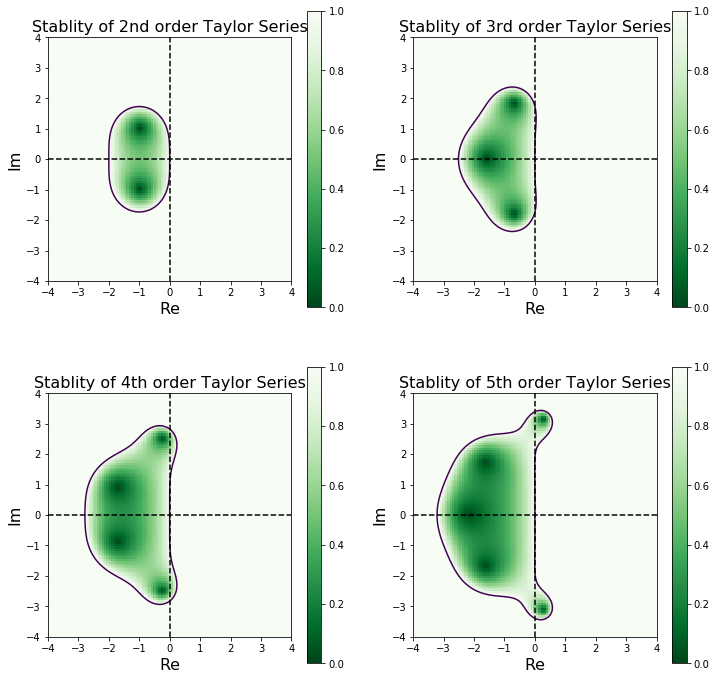

In [6]:
x = numpy.linspace(-4, 4, 100)
y = numpy.linspace(-4, 4, 100)

R_Taylor2 = lambda z: 1 + z + z**2/2 
R_Taylor3 = lambda z: 1 + z + z**2/2 + z**3/6.
R_Taylor4 = lambda z: 1 + z + z**2/2 + z**3/6. + z**4/24.
R_Taylor5 = lambda z: 1 + z + z**2/2 + z**3/6. + z**4/24. + z**5/120.

fig = plt.figure(figsize=(12, 12))
axes = fig.add_subplot(2, 2, 1)
plot_stability_ssms(R_Taylor2, x, y, axes = axes, title = 'Stablity of 2nd order Taylor Series')

axes = fig.add_subplot(2, 2, 2)
plot_stability_ssms(R_Taylor3, x, y, axes = axes, title = 'Stablity of 3rd order Taylor Series')

axes = fig.add_subplot(2, 2, 3)
plot_stability_ssms(R_Taylor4, x, y, axes = axes, title = 'Stablity of 4th order Taylor Series')

axes = fig.add_subplot(2, 2, 4)
plot_stability_ssms(R_Taylor5, x, y, axes = axes, title = 'Stablity of 5th order Taylor Series')

**(c)** [12] Linear Multi-Step schemes

Calculate the stability polynomial and plot the stability regions for
1. 3-step and 4-step Adams-Basforth methods, and
1. 3-step and 4-step Adams-Moulton methods.


And comment on the relative size of the stability regions for $RK4$, $AB4$ and $AM4$.
You may use the plotting code from the course notes

    Adams-Basforth Methods: 
    
Lets begin with the three step explicit method. We know that the method takes the form of: 

$$ U^{n + 3} = U^{n + 2} + \frac{h}{12} [23f(U^{n + 2}) - 16f(U^{n+1}) + 5f(U^{n})] $$

Now lets make it so that $f(U) = \lambda U$ and $ z = h \lambda $: 

$$ U^{n + 3} - U^{n + 2} - \frac{1}{12} [23zU^{n + 2} + 16zU^{n+1} - 5zU^{n}] = 0 $$

Now we can subsitute $ U^n = \xi^n $

$$ \xi^3 - \xi^2 - \frac{1}{12}[23z\xi^2 + 16z\xi - 5z] $$ 

Finally we can factor: 

$$ 12\xi^3 - (12 + 23z)\xi^2 + 16z\xi - 5z = 0 $$

Similar for the fourth step explicit method. We know that the method takes the form of: 

$$ U^{n+4} = U^{n+3} + \frac{h}{24}[55f(U^{n+3}) - 59f(U^{n+2}) + 37f(U^{n+1}) - f(U^{n})] $$

Now lets make it so that $f(U) = \lambda U$ and $ z = h \lambda $: 

$$ U^{n+4} = U^{n+3} + \frac{1}{24}[55zU^{n+3} - 59zU^{n+2} + 37zU^{n+1} - 9zU^{n}] $$

$$ U^{n+4} - U^{n+3} - \frac{1}{24}[55zU^{n+3} - 59zU^{n+2} + 37zU^{n+1} - 9zU^{n}] = 0 $$

Now we can subsitute $ U^n = \xi^n $

$$ \xi^4 - \xi^3 - \frac{1}{24}[55z\xi^3 - 59z\xi^2 + 37z\xi - 9z] = 0 $$

$$ 24\xi^4 - 24\xi^3 - 55z\xi^3 + 59z\xi^2 - 37z\xi + 9z = 0 $$

Finally we can factor: 

$$ 24\xi^4 - (24 + 55z)\xi^3 + 59z\xi^2 - 37z\xi + 9z$$


    Adams-Moulton Methods:
    
Lets begin with the three step explicit method. We know that the method takes the form of: 

$$ U^{n + 3} = U^{n + 2} + \frac{h}{24} [9f(U^{n + 3}) + 19f(U^{n + 2}) - 5f(U^{n + 1}) + f(U^{n})] $$

Now lets make it so that $f(U) = \lambda U$ and $ z = h \lambda $: 

$$ U^{n + 3} = U^{n + 2} + \frac{1}{24} [9zU^{n + 3} + 19zU^{n + 2} - 5zU^{n + 1} + zU^{n}] $$

Now we can subsitute $ U^n = \xi^n $

$$ \xi^3 = \xi^2 + \frac{1}{24} [9z\xi^3 + 19z\xi^2 - 5z\xi + z] $$

$$ \xi^3 - \xi^2 - \frac{1}{24} [9z\xi^3 + 19z\xi^2 - 5z\xi + z] = 0 $$

$$ 24\xi^3 - 24\xi^2 - 9z\xi^3 - 19z\xi^2 + 5z\xi - z = 0 $$

Finally we can factor: 

$$ (24 - 9z)\xi^3 - (24 + 19z)\xi^2 + 5z\xi - z = 0 $$

Now similarily for four step: 

$$ U^{n + 4} = U^{n + 3} + \frac{h}{720} [251f(U^{n + 4}) + 646f(U^{n + 3}) - 264f(U^{n + 2}) + 106f(U^{n + 1} -19f(U^n)] $$

Now lets make it so that $f(U) = \lambda U$ and $ z = h \lambda $: 

$$ U^{n + 4} = U^{n + 3} + \frac{1}{720} [251zU^{n + 4} + 646zU^{n + 3} - 264zU^{n + 2} + 106zU^{n + 1} -19zU^n] $$

Now we can subsitute $ U^n = \xi^n $

$$ \xi^4 = \xi^3 + \frac{1}{720} [251z\xi^4 + 646z\xi^3 - 264z\xi^2 + 106z\xi - 19z] $$

$$ 720\xi^4 - 720\xi^3 - 251z\xi^4 - 646z\xi^3 + 264z\xi^2 - 106z\xi + 19z = 0 $$

Now we can factor: 

$$ (720 - 251z)\xi^4 - (720 + 646z)\xi^3 + 264z\xi^2 - 106z\xi + 19z = 0 $$


In [7]:
def plot_stability_lmm(pi_coeff, x, y, axes=None, title=None):
       
    X,Y = numpy.meshgrid(x,y)
    Z = X + 1j * Y
    if axes is None:
        fig = plt.figure(figsize=(8,6))
        axes = fig.add_subplot(1,1,1)
    
    norm_max = numpy.empty(Z.shape)
    for i,row in enumerate(Z):
        for j, z in enumerate(row):
            norm_max[i,j] = max(numpy.abs(numpy.roots(pi_coeff(z))))
    
    stability_plot(X, Y, norm_max, axes, title)

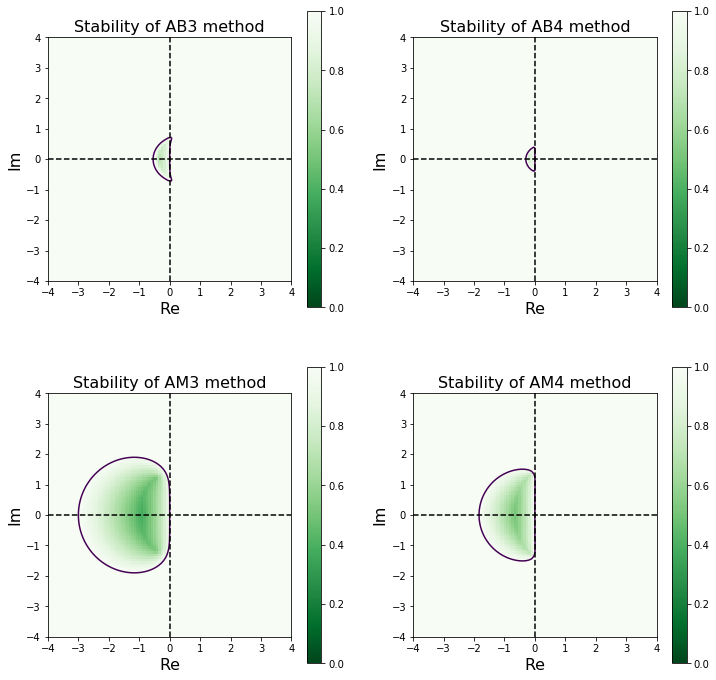

In [8]:
x = numpy.linspace(-4, 4, 100)
y = numpy.linspace(-4, 4, 100)

pi_AB3 = lambda z: numpy.array([12, -(12. + 23*z), 16*z, -5*z])
pi_AB4 = lambda z: numpy.array([24, -(24. + 55*z), 59*z, -37*z, 9*z])

pi_AM3 = lambda z: numpy.array([24 - 9*z, -(24. + 19*z), 5*z, -z])
pi_AM4 = lambda z: numpy.array([720 - 251*z, -(720 + 646*z), 264*z, -106*z, 19*z])

fig = plt.figure(figsize=(12,12))

axes = fig.add_subplot(2,2,1)
plot_stability_lmm(pi_AB3, x, y, axes=axes, title='Stability of AB3 method')

axes = fig.add_subplot(2,2,2)
plot_stability_lmm(pi_AB4, x, y, axes=axes, title='Stability of AB4 method')

axes = fig.add_subplot(2,2,3)
plot_stability_lmm(pi_AM3, x, y, axes=axes, title='Stability of AM3 method')

axes = fig.add_subplot(2,2,4)
plot_stability_lmm(pi_AM4, x, y, axes=axes, title='Stability of AM4 method')

**(d)** [8] The region of absolute stability as defined ensures that the error does not grow in subsequent time-steps hence why we require $|R(z)| < 1$.  In reality what we really want is that the errors decay faster than the solution or that it grows slower than the true solution.  Consider the solution of an ODE $u(t) = e^{\lambda t}$, if $\lambda < 0$ then we want our errors made at each time step $E^n$ to decay faster than $e^{\lambda t}$ so that $|E^n| < e^{\lambda t}$.  Conversely if $\lambda > 0$ then we might also want $|E^n| < e^{\lambda t}$.  This suggests a new definition of stability, called the **relative stability** defined as

$$|R(z)| \leq |e^z|.$$

These turn out to be difficult to plot but proved pivotal due to work in 1978 by Wanner, Hairer and Nørset.  More recently a new set of regions, called **order stars**, have become more popular to consider.  These are defined as the three regions

$$\begin{aligned}
    \mathcal{A}_{-} &= \{ z \in \mathbb{C}: |R(z)| < |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| < 1\}, \\ 
    \mathcal{A}_{0} &= \{ z \in \mathbb{C}: |R(z)| = |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| = 1\}, ~~~~\text{and} \\
    \mathcal{A}_{+} &= \{ z \in \mathbb{C}: |R(z)| > |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| > 1\}.
\end{aligned}$$

Modify your plotting routines above to plot order stars and identify all of the different regimes for the Taylor series methods asked for in part (a).  Do you see any relation to the number of "fingers" and the order of the method?

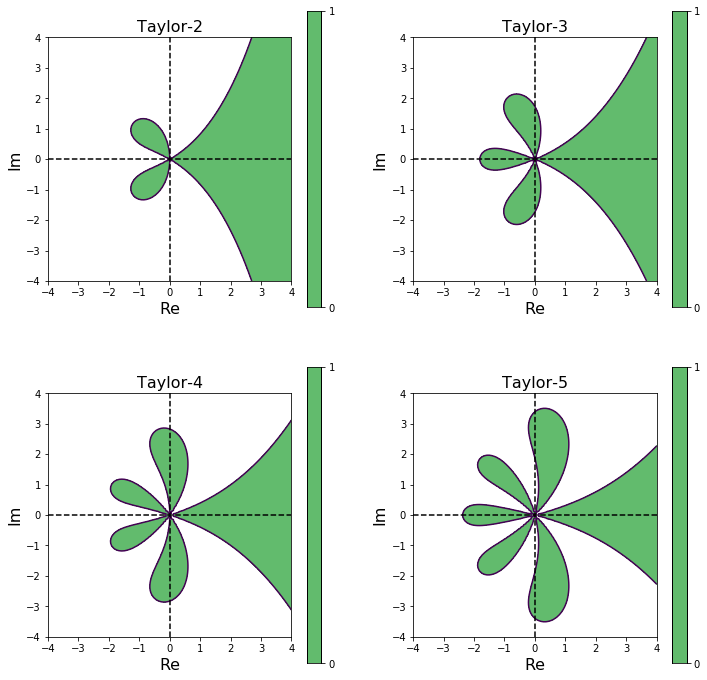

In [9]:
def plot_order_stars(R, x, y, axes=None, title=None):
       
    X,Y = numpy.meshgrid(x,y)
    Z = X + 1j * Y
    if axes is None:
        fig = plt.figure(figsize=(8,6))
        axes = fig.add_subplot(1,1,1)
        
    order_star = numpy.abs(numpy.exp(-Z) * R(Z))
    stability_plot(X, Y, order_star, axes, title, continuous=False)

fig = plt.figure(figsize=(12, 12))
Rs = [ R_Taylor2, R_Taylor3, R_Taylor4, R_Taylor5 ]

for i, R in enumerate(Rs):
    axes = fig.add_subplot(2, 2, i + 1)
    plot_order_stars(R, x, y, axes, title='Taylor-{}'.format(i+2))

The number of 'fingers' relates to the order of the Taylor method. 

### Question 2 - stiff equations

Consider a simplified radioactive decay chain  that transforms a radioactive nuclide (like $^{235}$U) to a stable nuclide (like $^{207}$Pb) (for the real thing see [this](http://metadata.berkeley.edu/nuclear-forensics/Decay%20Chains.html))

$$
    u_1 \overset{K_1}{\rightarrow} u_2 \overset{K_2}{\rightarrow} u_3 \overset{K_3}{\rightarrow} u_4
$$
represented by the system of ODEs
\begin{align*}
    \frac{\text{d}u_1}{\text{d}t} &= -K_1 u_1 \\
    \frac{\text{d}u_2}{\text{d}t} &= K_1 u_1 - K_2 u_2 \\
    \frac{\text{d}u_3}{\text{d}t} &= K_2 u_2 - K_3 u_3 \\
    \frac{\text{d}u_4}{\text{d}t} &= K_3 u_3 \\
\end{align*}

where $\lambda_i$ are the decay constants for each nuclide (with the standard understanding that the decay constants are reported as $> 0$)

**(a)** rewrite this problem as a linear dynamical system

$$
    \frac{d\mathbf{u}}{dt} = A\mathbf{u}
$$

where 

$$
    \mathbf{u} = \begin{bmatrix} u_1 \\ u_2 \\ u_3 \\u_4 \\ \end{bmatrix}
$$

and $A$ is a matrix of constant coefficients.  Answer the following questions

1. what is the structure of the matrix $A$?
- what are the eigenvalues of the matrix $A$?
- what is the general analytic solution of the initial value problem 
$$
    \frac{d\mathbf{u}}{dt} = A\mathbf{u}\quad \mathbf{u}(0) = \mathbf{u}_0
$$
for arbitrary initial condition $\mathbf{u}_0$. **NOTE:** (just assume the eigenvectors exist, you don't need to compute them although they can be written analytically, **extra credit** for the full solution)

    

    Structure of Matrix A: 
    
$$ \begin{bmatrix}
-K_1 & 0 & 0 & 0 \\
K_1 & -K_2 & 0 & 0 \\
0 & K_2 & -K_3 & 0 \\
0 & 0 & K_3 & 0
\end{bmatrix} $$

    Eigen Values of Matrix A:
    
These are just the diagonal values of the matrix since it is a lower triangular matrix. 

$$ \lambda_1 = -K_1 $$

$$ \lambda_2 = -K_2 $$

$$ \lambda_3 = -K_3 $$

$$ \lambda_4 = 0 $$

    General Analytic Solution: 

$$ u(t) = Se^hS^{-1}u_0 = \sum_{n=1}^{4} c_n e^{\lambda_nt}S_i $$

**(a)** [5] Write a general function  `setA(K)`,  to assemble a $N\times N$ matrix $A$ given an  array of $N-1$ decay constants.


In [10]:
def setA(K):
    """ set the Decay Matrix A, given decay constants K_i i=1,N
    
    Parameters
    ----------
        K: numpy array of decay constants [ K_1, K_2, ... K_N-1 ]
            assumes the final decay constant is 0
        
    Returns
    -------
        A: numpy 2d array of size N x N where N = len(K) + 1
    """
    
    N = len(K) + 1
    K1 = numpy.append(-K, 0)
    A = numpy.zeros((N, N))
    numpy.fill_diagonal(A, K1)
    numpy.fill_diagonal(A[1:, :-1], K)
    
    return A


In [11]:
K = numpy.array([ 1.0, 2.0, 3.0 ])
# test setA
A = setA(K)
print('A = \n{}'.format(A))

u_0 = numpy.array([1.0, 0.0, 0.0, 0.0])
answer = numpy.array([-1.0, 1.0, 0., 0.])
numpy.testing.assert_allclose(A.dot(u_0), answer)
print('Passed setA test')

A = 
[[-1.  0.  0.  0.]
 [ 1. -2.  0.  0.]
 [ 0.  2. -3.  0.]
 [ 0.  0.  3.  0.]]
Passed setA test


**(b)** Write a function `solve_decay_system` that uses `setA` and `scipy.integrate.solve_ivp` to compute the solution to the system of ODEs given an initial condition and time points to output at.  This function should take in the time points for the output, an initial condition, the ODE integrator to use (default to "RK45"), and the reaction rates $K_1$, $K_2$, and $K_3$.
You'll want to set `dense_output=True`, for use in part (b)

In [12]:
def solve_decay_system(t_span, u_0,  K , method="RK45"):
    """ wrapper function to solve a 4 nuclide decay chain using scipy.integrate.solve_ivp
    
    parameters:
    -----------
    t_span: arraylike
        time range of integration t_span = [ t_min, t_max]
    u_0: ndarray of length 4
        numpy array of initial conditions 
    K: ndarray of length 3
    method: String
        a string containing one of the integration schemes available in solve_ivp
        one of "RK45", "RK23", "Radau", "BDF", "LSODA"
    """
    
    A = setA(K)
    f = lambda t,u: A.dot(u)
    sol = solve_ivp(f, t_span, u_0, method='RK45', dense_output=True)

    return sol

In [13]:
t_span = numpy.array([0.,1.])
sol = solve_decay_system(t_span, u_0, K, method='RK45')
t_test = numpy.linspace(0.,1.,10)
U_sol = numpy.array([[1.                , 0.8948393163712829, 0.800737401761885 ,
        0.7165313047527748, 0.6411802756034415, 0.5737534285773721,
        0.5134168033756287, 0.4594256588569134, 0.4111123936333331,
        0.3678795370466755],
       [0.                , 0.094101921174881 , 0.1595570258526453,
        0.2031143245142019, 0.2300709213438262, 0.2445598261804927,
        0.2498262704968908, 0.2483567965861113, 0.2420949351732015,
        0.2325408759062688],
       [0.                , 0.0098958300342681, 0.0317938394434248,
        0.0575760898841458, 0.0825409265439265, 0.1042479895430072,
        0.1215393110543409, 0.1342463444695756, 0.142589521806582 ,
        0.1470100078082271],
       [0.                , 0.001162932419568 , 0.0079117329420449,
        0.0227782808488774, 0.0462078765088057, 0.077438755699128 ,
        0.1152176150731396, 0.1579712000873996, 0.2042031493868833,
        0.2525695792388284]])
numpy.testing.assert_allclose(sol.sol(t_test), U_sol)
print("Success!")

Success!


**(b)** [10] Visualize  your solution given the input data provided above and again using the `RK45` integrator. Make four subplots

1. Plot the concentrations of the Nuclides against time showing the actual steps taken by the integrator as well as smooth solution from the dense output (hint: see the documentation for [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) and [this](https://stackoverflow.com/questions/36699155/how-to-get-color-of-most-recent-plotted-line-in-pythons-plt) to match colors.  Do not forget to provide the appropriate labels.
- Also plot $\Delta t(t)$ used by the adaptive time stepper and list the maximum number of steps taken
- Which eigenvalue controls stability?  For this eigenvalue, calculate $z=\lambda \Delta t$ at each time-step and plot on the stability diagram for Taylor-4 and Taylor-5 (which are equivalent to the stability plots for RK4 and RK5). Which order scheme is controlling the stability?



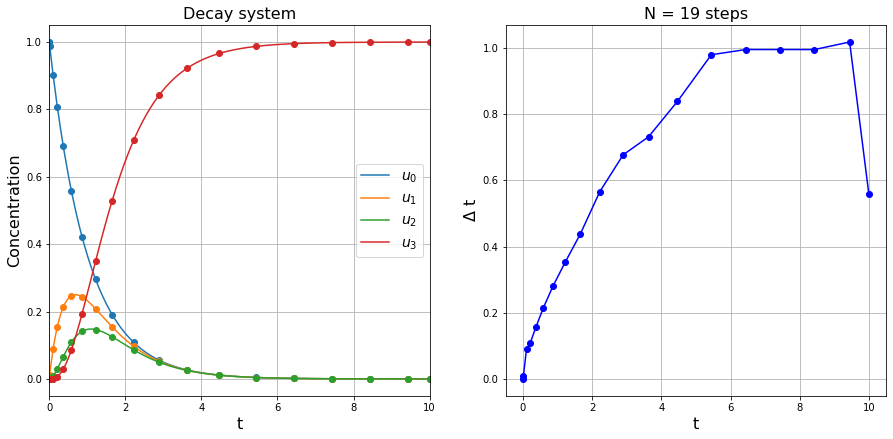

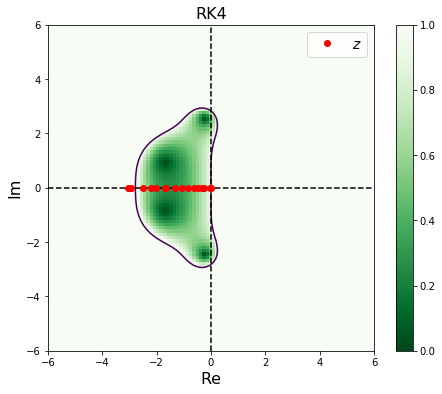

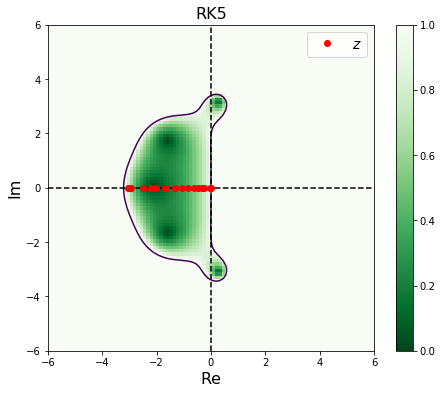

In [15]:
def stability_plot_2(X, Y, C,axes,K,dt, title=None, continuous=True):
    if  continuous:
        Ch = C
    else:
        Ch = numpy.heaviside(C-1,0.)
    pcolor_plot = axes.pcolor(X, Y, Ch, vmin=0, vmax=1, cmap=plt.get_cmap('Greens_r'))
    axes.contour(X, Y, C, 'k', levels=[1.0])
    fig = plt.gcf()
    fig.colorbar(pcolor_plot)
    axes.plot(x, numpy.zeros(x.shape),'k--')
    axes.plot(numpy.zeros(y.shape), y,'k--')
    axes.plot(-numpy.max(K)*dt, numpy.zeros(dt.shape),'ro',label="$z$")
    axes.legend(loc='best',fontsize=14)
    axes.set_xlabel('Re', fontsize=16)
    axes.set_ylabel('Im', fontsize=16)
    if title is not None:
        axes.set_title(title, fontsize=16)
    
    axes.set_aspect('equal')  
    
def plot_stability_ssms_2(R, x, y,K,dt,axes=None, title=None):
    X,Y = numpy.meshgrid(x,y)
    Z = X + 1j * Y
    if axes is None:
        fig = plt.figure(figsize=(8,6))
        axes = fig.add_subplot(1,1,1)
    
    abs_R = numpy.abs(R(Z))
    stability_plot_2(X, Y, numpy.abs(R(Z)),axes,K,dt,title)



t_span = numpy.array([0., 10.])
K = numpy.array([1.0, 2.0, 3.0])
u_0 = numpy.array([1., 0., 0., 0.])
sol = solve_decay_system(t_span, u_0,  K , method="RK45")
fig = plt.figure(figsize=(15, 15))
axes = fig.add_subplot(2, 2, 1)
                     
t = numpy.linspace(t_span[0], t_span[1], 200)
for i in range (4):
    p = axes.plot(t, sol.sol(t)[i], label = format('$u_{}$'.format(i)))
    color = p[0].get_color()
    axes.plot(sol.t, sol.y[i], 'o', color=color)

axes.set_xlabel('t', fontsize=16)
axes.set_ylabel('Concentration', fontsize=16)
axes.set_title('Decay system', fontsize=16)
axes.legend(loc='best',fontsize=14)
axes.grid()
axes.set_xlim([0, 10])

axes = fig.add_subplot(2, 2, 2)
dt = sol.t[1:] - sol.t [:-1]
axes.plot(sol.t[1:], dt, 'bo-')
axes.set_xlabel('t', fontsize=16)
axes.set_ylabel('$\Delta$ t', fontsize=16)
axes.set_title('N = {} steps'.format(len(sol.t)-1), fontsize=16)
axes.grid()
plt.show()

x = numpy.linspace(-6,6,100)
y = numpy.linspace(-6,6,100)
axes = fig.add_subplot(2, 2, 3)
plot_stability_ssms_2(R_Taylor4, x, y,K,dt,axes=None, title='RK4'.format(i+2))

axes = fig.add_subplot(2, 2, 4)
plot_stability_ssms_2(R_Taylor5, x, y,K,dt,axes=None, title='RK5'.format(i+2))

plt.show()

This problem only takes 19 steps, which is actually pretty good. We can also see from the stability diagram that the higher order scheme is controlling the time step stability (it is able to take long time steps that are unstable for RK4 but stable for RK5).

**(c)** [4] Now let's make this problem stiff by introducing a very fast decaying second nuclide.  repeat the exercise and figures but now using $K_2=1000.$ 

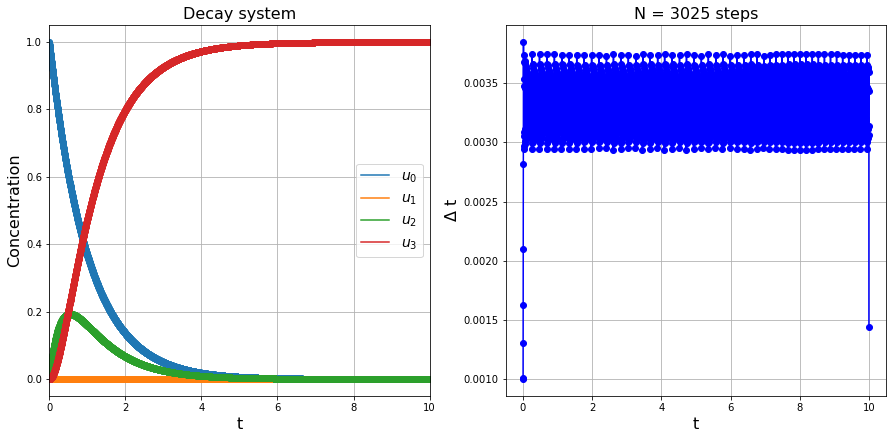

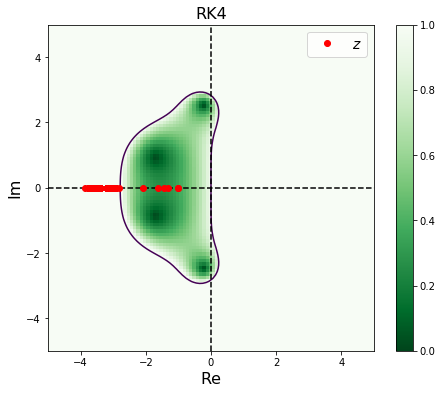

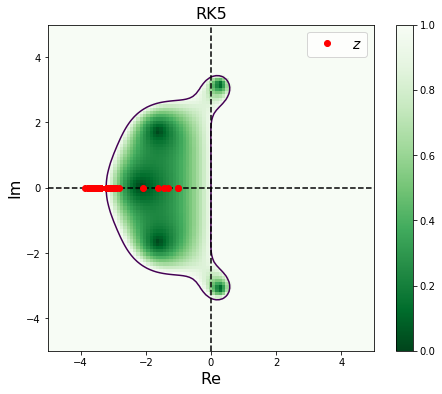

In [18]:
t_span = numpy.array([0., 10.])
K = numpy.array([1.0, 1000.0, 3.0])
u_0 = numpy.array([1., 0., 0., 0.])
sol = solve_decay_system(t_span, u_0,  K , method="RK45")
fig = plt.figure(figsize=(15, 15))
axes = fig.add_subplot(2, 2, 1)
                     
t = numpy.linspace(t_span[0], t_span[1], 200)
for i in range (4):
    p = axes.plot(t, sol.sol(t)[i], label = format('$u_{}$'.format(i)))
    color = p[0].get_color()
    axes.plot(sol.t, sol.y[i], 'o', color=color)

axes.set_xlabel('t', fontsize=16)
axes.set_ylabel('Concentration', fontsize=16)
axes.set_title('Decay system', fontsize=16)
axes.legend(loc='best',fontsize=14)
axes.grid()
axes.set_xlim([0, 10])

axes = fig.add_subplot(2, 2, 2)
dt = sol.t[1:] - sol.t [:-1]
axes.plot(sol.t[1:], dt, 'bo-')
axes.set_xlabel('t', fontsize=16)
axes.set_ylabel('$\Delta$ t', fontsize=16)
axes.set_title('N = {} steps'.format(len(sol.t)-1), fontsize=16)
axes.grid()
plt.show()

x = numpy.linspace(-5,5,100)
y = numpy.linspace(-5,5,100)
axes = fig.add_subplot(2, 2, 3)
plot_stability_ssms_2(R_Taylor4, x, y,K,dt,axes=None, title='RK4'.format(i+2))

axes = fig.add_subplot(2, 2, 4)
plot_stability_ssms_2(R_Taylor5, x, y,K,dt,axes=None, title='RK5'.format(i+2))

plt.show()

Adding a "fast" mode seems to make the time steps increase by several orders of magnitude. It seems to be taking steps of an order 1/1000. They also seem to be slightly out of the region of stability. 

**(d)**  [4] Repeat the stiff problem but choose any method appropriate for stiff equations in `solve_ivp`.  Provide a brief description of how the solver is choosing time steps.  Feel free to try different methods

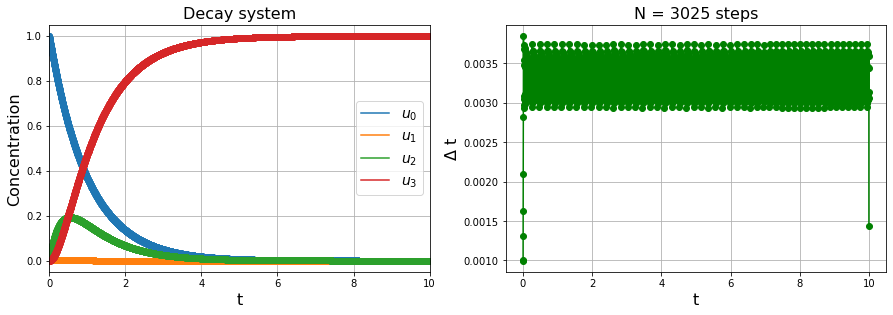

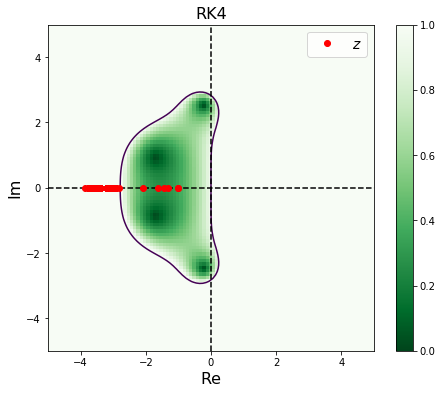

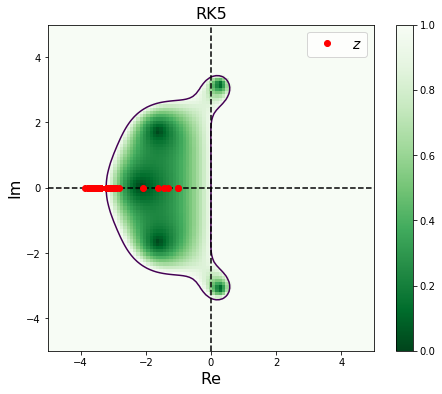

In [21]:
t_span = numpy.array([0., 10.])
K = numpy.array([1.0, 1000.0, 3.0])
u_0 = numpy.array([1., 0., 0., 0.])
sol = solve_decay_system(t_span, u_0,  K , method='BDF')
fig = plt.figure(figsize=(15, 10))
axes = fig.add_subplot(2, 2, 1)
                     
t = numpy.linspace(t_span[0], t_span[1], 200)
for i in range (4):
    p = axes.plot(t, sol.sol(t)[i], label = format('$u_{}$'.format(i)))
    color = p[0].get_color()
    axes.plot(sol.t, sol.y[i], 'o', color=color)

axes.set_xlabel('t', fontsize=16)
axes.set_ylabel('Concentration', fontsize=16)
axes.set_title('Decay system', fontsize=16)
axes.legend(loc='best',fontsize=14)
axes.grid()
axes.set_xlim([0, 10])

axes = fig.add_subplot(2, 2, 2)
dt = sol.t[1:] - sol.t [:-1]
axes.plot(sol.t[1:], dt, 'go-')
axes.set_xlabel('t', fontsize=16)
axes.set_ylabel('$\Delta$ t', fontsize=16)
axes.set_title('N = {} steps'.format(len(sol.t)-1), fontsize=16)
axes.grid()
plt.show()

x = numpy.linspace(-5,5,100)
y = numpy.linspace(-5,5,100)
axes = fig.add_subplot(2, 2, 3)
plot_stability_ssms_2(R_Taylor4, x, y,K,dt,axes=None, title='RK4'.format(i+2))

axes = fig.add_subplot(2, 2, 4)
plot_stability_ssms_2(R_Taylor5, x, y,K,dt,axes=None, title='RK5'.format(i+2))

plt.show()

Radau has no criterion for stability. It simply chooses a time step for accuracy which follow the decay of the most abundant element. 

**(e)** [4] Write a fixed time step BDF-2 scheme to solve this problem.  (hint:  this is a LMM, you'll need to figure out how to get started). you can use numpy.linalg.solve to solve the implicit linear system.  

In [22]:
def BDF2(A, t_span, u_0, N):
    """
    uses a BDF2 scheme to solve the autonomous linear dynamical system u' = Au, u(0) = u_0
    with f(U) = Au
    
         3 U_{n+2} - 4 U_{n+1} + U_n = 2 \Delta t f(U_{n+2}) \\
         
    Parameters:
    -----------
    A: ndarray  
        m x m matrix of Coefficients such that F(u) = Au where m =len(u0)
    t_span: tuple, arraylike
        time span over which to integrate [t_min, t_max]
    u_0:  ndarray (len(n))
        array of initial conditions
    N: integer
        number of time steps
        
    Returns:
    --------
    t: numpy array, 
        actual time-steps take
    u:  ndarray of shape m x N
        solution array
    
    """
    
    t = numpy.linspace(t_span[0], t_span[1], N)
    h = t[1] - t[0]
    m = len(u_0)
    
    u = numpy.empty((N, m))
    u[0] = u_0
    
    B = numpy.eye(m) - h * A
    u[1] = numpy.linalg.solve(B, u[0])
    
    B = 3 * numpy.eye(m) - 2 * h * A
    
    for n in range (N - 2):
        u[n + 2] = numpy.linalg.solve(B, 4 * u[n + 1] - u[n])
    
    return t, u.transpose()

K = numpy.array([1.0, 2.0, 3.0])
A = setA(K)
N = 100
t_span = [0., 10.]
u_0 = numpy.array([1., 0., 0., 0.])
t, u = BDF2(A, t_span, u_0, N)
sol = solve_decay_system(t_span, u_0, K, method='BDF')

numpy.testing.assert_allclose(u, sol.sol(t),rtol=10., atol=1.e-3)
print('success!')

success!


In [23]:
K = [1., 2., 3.]
A = setA(K)
N = 100
t_span = [0., 10.]
u_0 = numpy.array([1., 0., 0., 0.])
t, u = BDF2(A, t_span, u_0, N)
sol = solve_decay_system(t_span, u_0, K, method='BDF')

numpy.testing.assert_allclose(u, sol.sol(t),rtol=10., atol=1.e-3)
print('success!')

TypeError: bad operand type for unary -: 'list'

**(f)** [10] Graphically compare your solution to solve_ivp. 
* Make a plot that overlays your solution with that of solve_ivp
* Make a convergence plot that calculates the maximum absolute error between your solution and solve_ivp as a function of $\Delta t$ for $N = 2^n$ for $n\in[5,13]$.  Comment on the result.
* Do this for both 
$$
    K_1 = 1.,~~ K_2 = 2.,~~ K_3 = 3.
$$ 

and the stiff problem with $K_2 = 1000.$

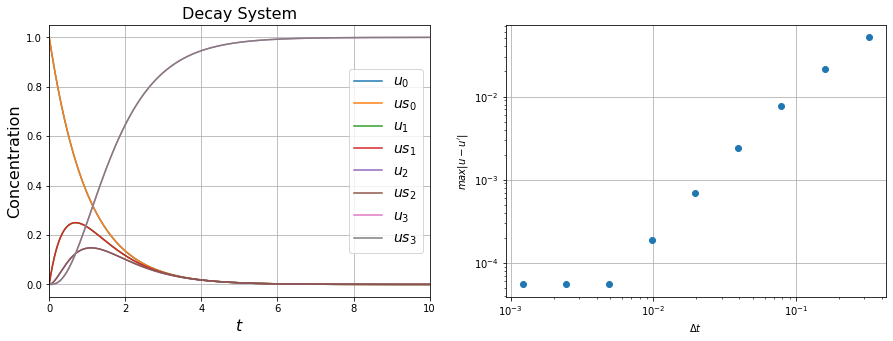

In [27]:
K = numpy.array([1.,2.,3.,])
A = setA(K)
t,u = BDF2(A,t_span,u_0,N)
sol = solve_decay_system(t_span,u_0,K,method='BDF')

fig = plt.figure(figsize=(15,5))
axes = fig.add_subplot(1,2,1)

for i in range(4):
    p = axes.plot(t,u[i],'-',label=format('$u_{}$'.format(i)))
    axes.plot(t,sol.sol(t)[i],label=format('$us_{}$'.format(i)))


axes.set_xlabel('$t$', fontsize=16)
axes.set_ylabel('Concentration', fontsize=16)
axes.set_title('Decay System', fontsize=16)
axes.legend(loc='best',fontsize=14)
axes.grid()
axes.set_xlim([0, 10])

axes = fig.add_subplot(1,2,2)
Narray = [2**n for n in range(5,14)]
err = numpy.zeros(len(Narray))
delta_t = numpy.zeros(err.shape)

for i,N in enumerate(Narray):
    t,u = BDF2(A,t_span,u_0,N)
    sol = solve_decay_system(t_span,u_0,K,method='BDF')
    err[i] = numpy.max(numpy.linalg.norm(u - sol.sol(t),numpy.inf,axis=1))
    delta_t[i] = t[1] - t[0]

axes.loglog(delta_t,err,'o')
axes.set_xlabel('$\Delta t$')
axes.set_ylabel("$max|u-u'|$")
axes.grid()

plt.show()


The early points seem to have an error.

**Extra-Extra-Credit** write an adaptive time-stepper using a combination of BDF-2 and BDF-3 and compare your solution to solve_ivp (you'll also need to figure out how to use interpolation to adjust the time step).  Full disclosure:  I haven't done this yet but it should be doable